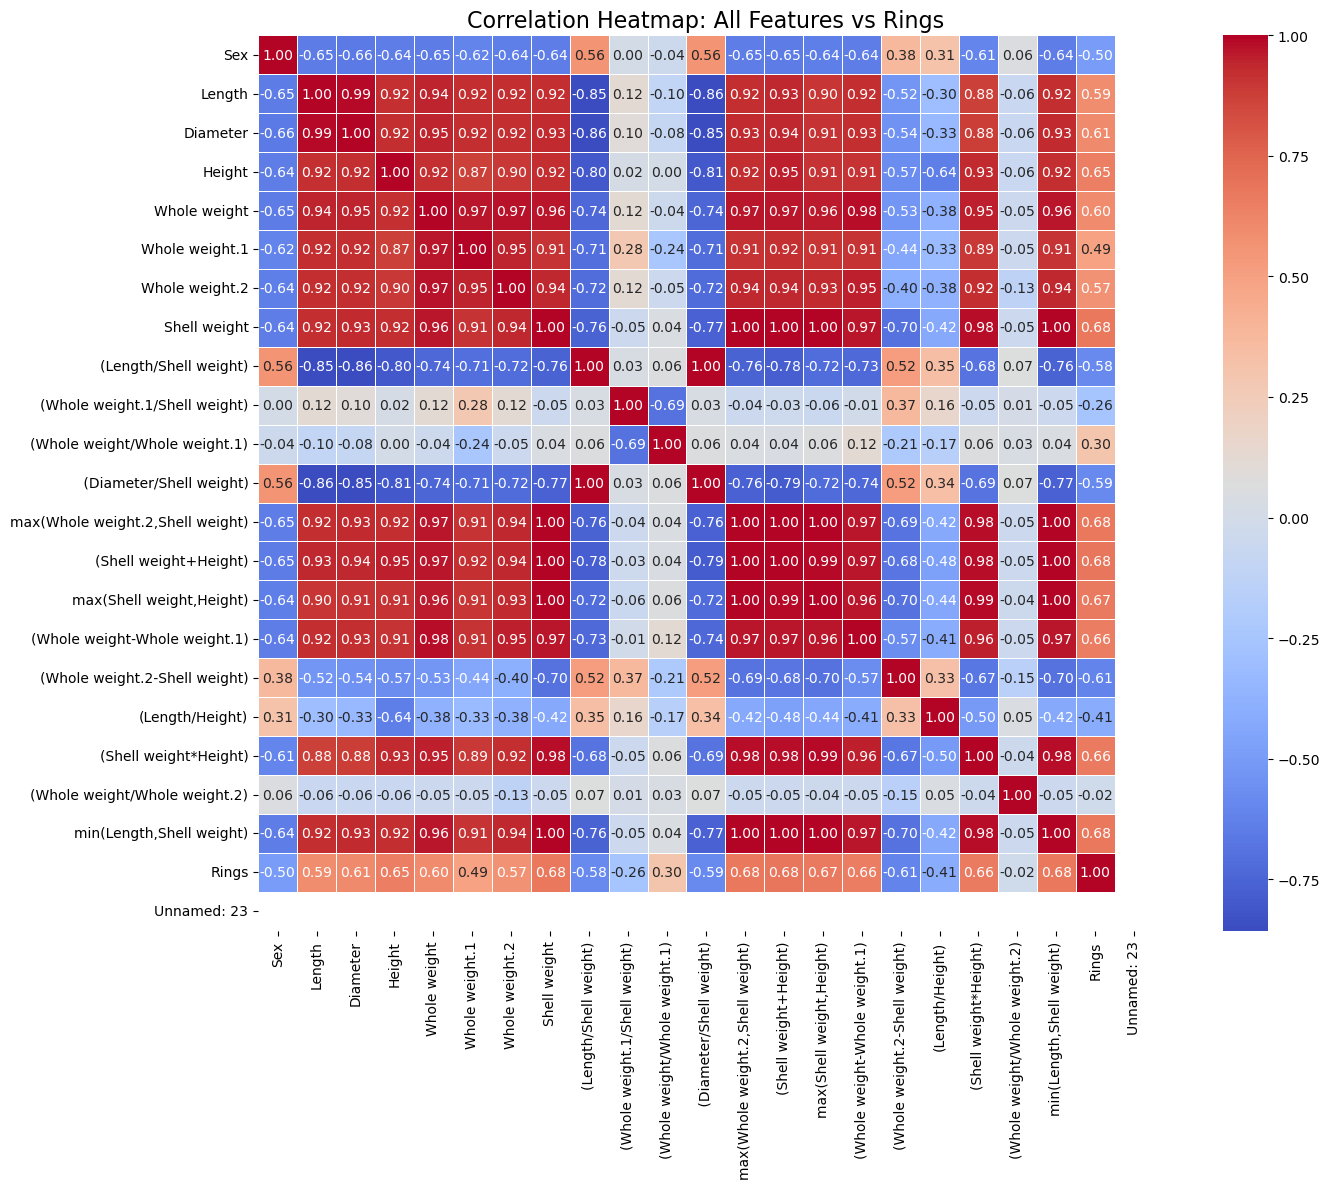

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("train_newfeature.csv")


cols_to_use = [col for col in df.columns if col.lower() != "id"]
df_filtered = df[cols_to_use]


corr_matrix = df_filtered.corr(numeric_only=True)


plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Heatmap: All Features vs Rings", fontsize=16)
plt.tight_layout()
plt.show()

But the correlation only help with the strengh of linear relationship

 Mutual Information (MI)

Mutual Information Scores (excluding sex):
Shell weight                        0.631366
 (Diameter/Shell weight)            0.627380
max(Whole weight.2,Shell weight)    0.627014
(Length/Shell weight)               0.625601
min(Length,Shell weight)            0.622422
(Shell weight*Height)               0.614137
max(Shell weight,Height)            0.612667
(Shell weight+Height)               0.610989
(Whole weight-Whole weight.1)       0.547825
Whole weight                        0.521226
Height                              0.498580
Diameter                            0.492446
Whole weight.2                      0.491816
Length                              0.481952
Whole weight.1                      0.461688
(Length/Height)                     0.337028
(Whole weight.2-Shell weight)       0.324262
Sex                                 0.234484
(Whole weight.1/Shell weight)       0.224225
(Whole weight/Whole weight.1)       0.210599
(Whole weight/Whole weight.2)       0.116464
dtype: float

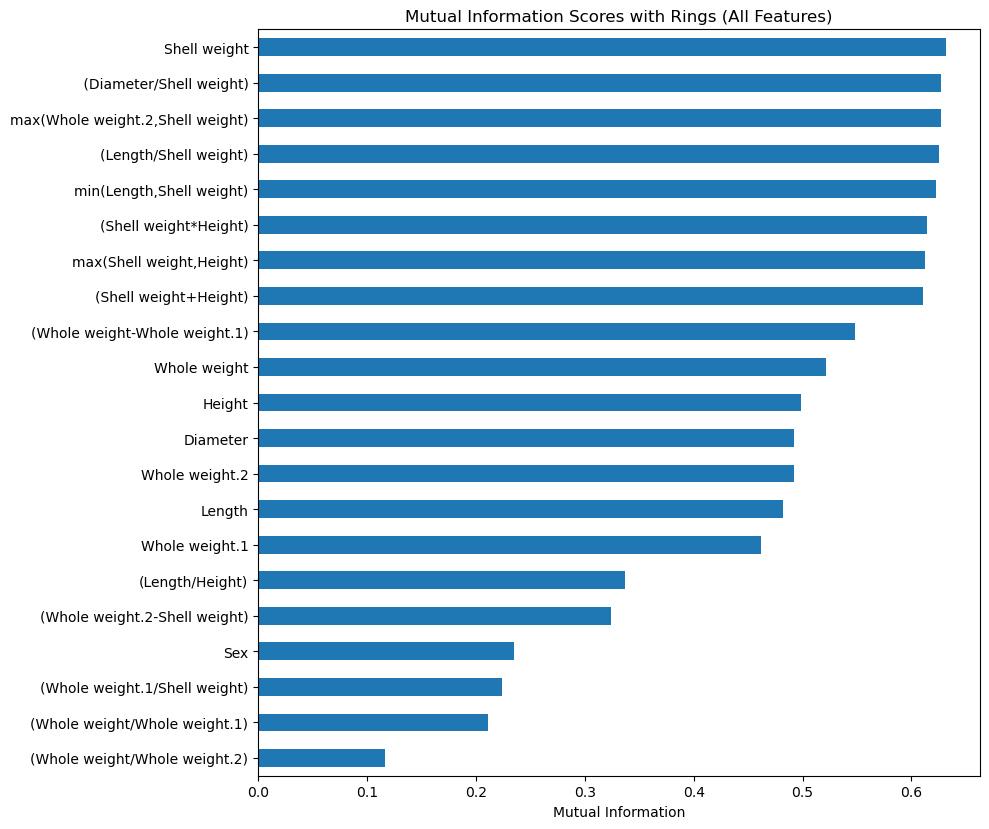

In [9]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt

df = pd.read_csv('train_newfeature.csv')


X = df.drop(columns=['id', 'Rings'])
y = df['Rings']


X = X.apply(pd.to_numeric, errors='coerce')


X = X.fillna(X.median(numeric_only=True))


mi_scores = mutual_info_regression(X, y, discrete_features='auto')
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)


print("Mutual Information Scores (excluding sex):")
print(mi_series)


plt.figure(figsize=(10, max(6, len(mi_series) * 0.4)))  
mi_series.plot(kind='barh')
plt.gca().invert_yaxis() 
plt.title('Mutual Information Scores with Rings (All Features)')
plt.xlabel('Mutual Information')
plt.tight_layout()
plt.show()




